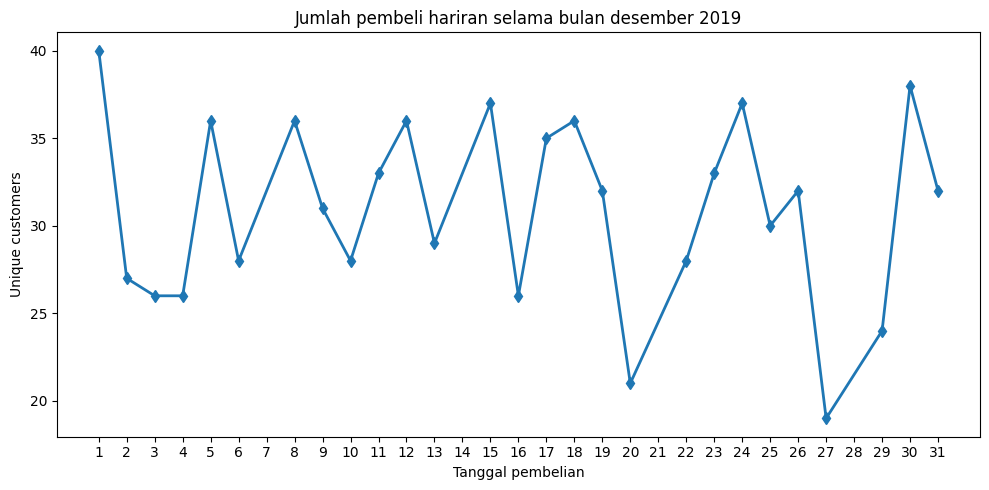

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')
df['order_date'] = pd.to_datetime(df['order_date'])

december_data = df[(df['order_date'].dt.month == 12) & (df['order_date'].dt.year == 2019)]
daily_customers = december_data.groupby(december_data['order_date'].dt.day)['customer_id'].nunique()

plt.figure(figsize=(10, 5))
plt.plot(daily_customers.index, daily_customers.values, marker='d', linestyle='-', linewidth=2)
plt.title('Jumlah pembeli hariran selama bulan desember 2019')
plt.xlabel('Tanggal pembelian')
plt.ylabel('Unique customers')
plt.xticks(range(1, 32))
plt.tight_layout()

plt.show()


In [3]:
brand_product_count = december_data.groupby('brand')['quantity'].sum().reset_index()
brand_product_count_sorted = brand_product_count.sort_values('quantity', ascending=False)
top_5_brands = brand_product_count_sorted.head(5)

print("Penjualan top 5 bbrand:")
for index, row in top_5_brands.iterrows():
    print(f" {row['brand']}, produk terjual : {row['quantity']}")

Penjualan top 5 bbrand:
 BRAND_S, produk terjual : 2197
 BRAND_P, produk terjual : 2194
 BRAND_R, produk terjual : 1508
 BRAND_C, produk terjual : 1365
 BRAND_A, produk terjual : 1315


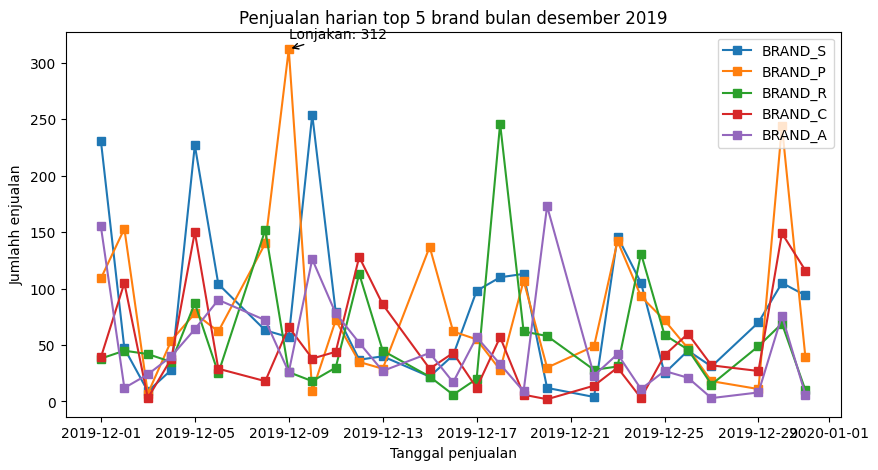

In [13]:
daily_quantity = december_data.groupby(['order_date', 'brand'])['quantity'].sum().reset_index()
top_5_brands = december_data.groupby('brand')['quantity'].sum().nlargest(5).index
plt.figure(figsize=(10, 5))
lonjakan_tanggal = None
lonjakan_quantity = None
for brand in top_5_brands:
    brand_data = daily_quantity[daily_quantity['brand'] == brand]
    plt.plot(brand_data['order_date'], brand_data['quantity'], marker='s', linestyle='-', label=brand)
    tanggal_lonjakan = brand_data.loc[brand_data['quantity'].idxmax(), 'order_date']
    quantity_lonjakan = brand_data.loc[brand_data['quantity'].idxmax(), 'quantity']
    if lonjakan_quantity is None or quantity_lonjakan > lonjakan_quantity:
        lonjakan_tanggal = tanggal_lonjakan
        lonjakan_quantity = quantity_lonjakan
plt.annotate(f'Lonjakan: {lonjakan_quantity}',
             xy=(lonjakan_tanggal, lonjakan_quantity),
             xytext=(lonjakan_tanggal, lonjakan_quantity + 10),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             ha='left')
plt.title('Penjualan harian top 5 brand bulan desember 2019')
plt.xlabel('Tanggal penjualan')
plt.ylabel('Jumlahh enjualan')
plt.legend()
plt.show()

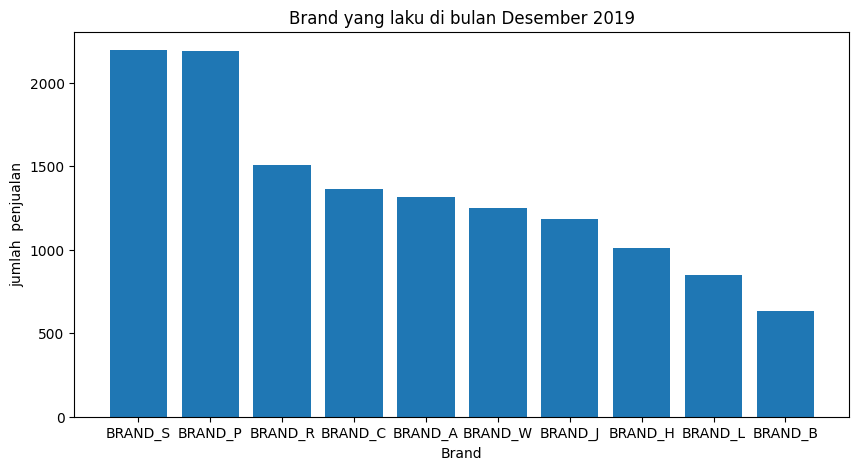

In [14]:
plt.figure(figsize=(10,5))
plt.bar(brand_product_count_sorted['brand'], brand_product_count_sorted['quantity'])
plt.title('Brand yang laku di bulan Desember 2019')
plt.xlabel('Brand')
plt.ylabel('jumlah  penjualan')
plt.show()

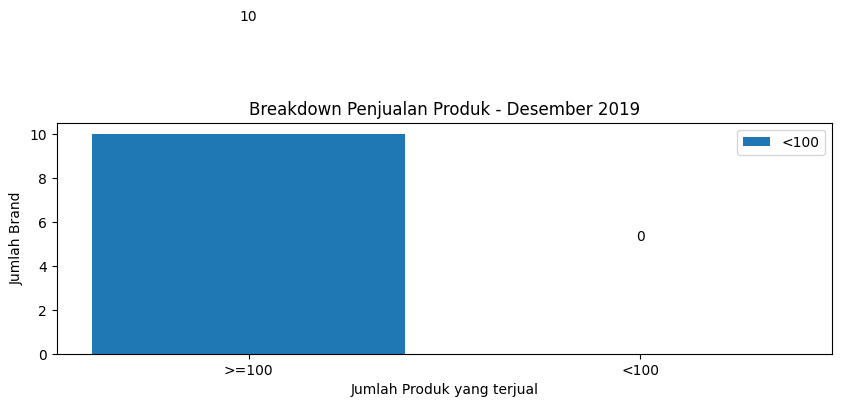

In [17]:
brand_product_count_sorted['category'] = pd.cut(brand_product_count_sorted['quantity'], bins=[0, 100, float('inf')], labels=['<100', '>=100'])

category_counts = brand_product_count_sorted['category'].value_counts()

plt.figure(figsize=(10, 3))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Jumlah Produk yang terjual')
plt.ylabel('Jumlah Brand')
plt.title('Breakdown Penjualan Produk - Desember 2019')
plt.legend(['<100', '>=100'])

for i, v in enumerate(category_counts.values):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')
plt.show()

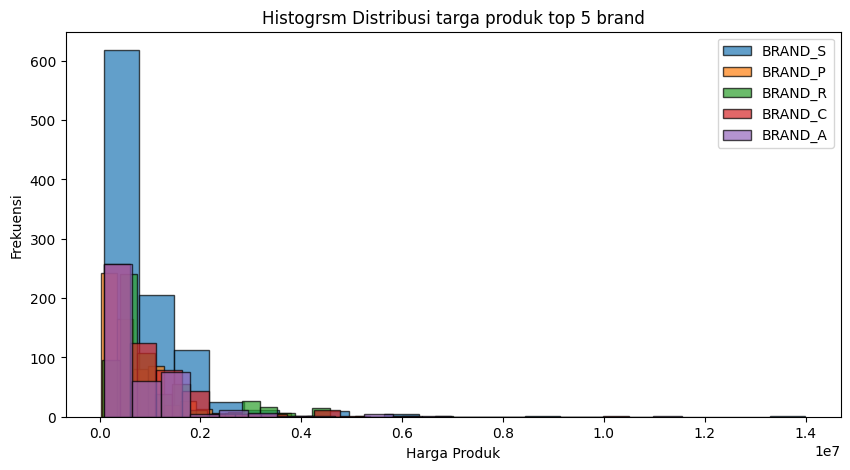

In [19]:
top_5_brands = brand_product_count_sorted.head(5)
top_5_data = df[df['brand'].isin(top_5_brands['brand'])]
brand_median_prices = top_5_data.groupby('brand')['item_price'].median()
plt.figure(figsize=(10, 5))
for brand in top_5_brands['brand']:
    brand_data = top_5_data[top_5_data['brand'] == brand]
    plt.hist(brand_data['item_price'], bins=20, edgecolor='black', alpha=0.7, label=brand)
plt.xlabel('Harga Produk')
plt.ylabel('Frekuensi')
plt.title('Histogrsm Distribusi targa produk top 5 brand')
plt.legend()
plt.show()

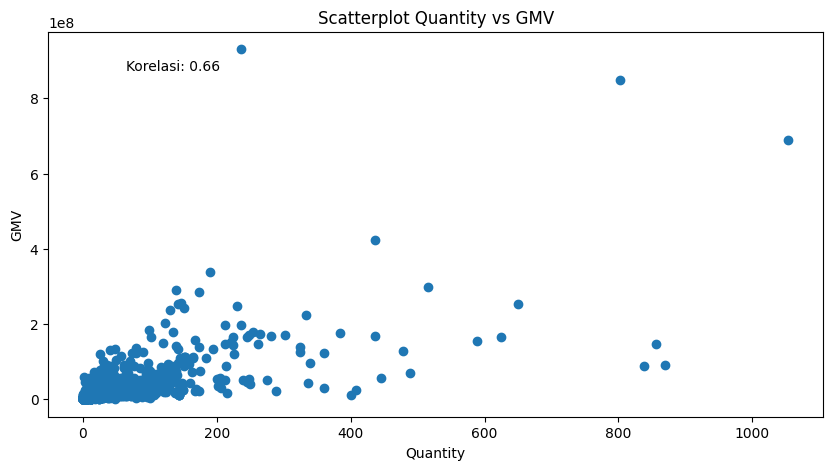

In [8]:
df['GMV'] = df['quantity'] * df['item_price']
data_product = df.groupby('product_id').agg({
    'quantity': 'sum',
    'GMV': 'sum',
    'item_price': 'median'
}).reset_index()

plt.figure(figsize=(10, 5))
plt.scatter(data_product['quantity'], data_product['GMV'])
plt.xlabel('Quantity')
plt.ylabel('GMV')
plt.title('Scatterplot Quantity vs GMV')
correlation_gmv = data_product['quantity'].corr(data_product['GMV'])
plt.text(0.1, 0.9, f'Korelasi: {correlation_gmv:.2f}', transform=plt.gca().transAxes)
plt.show()

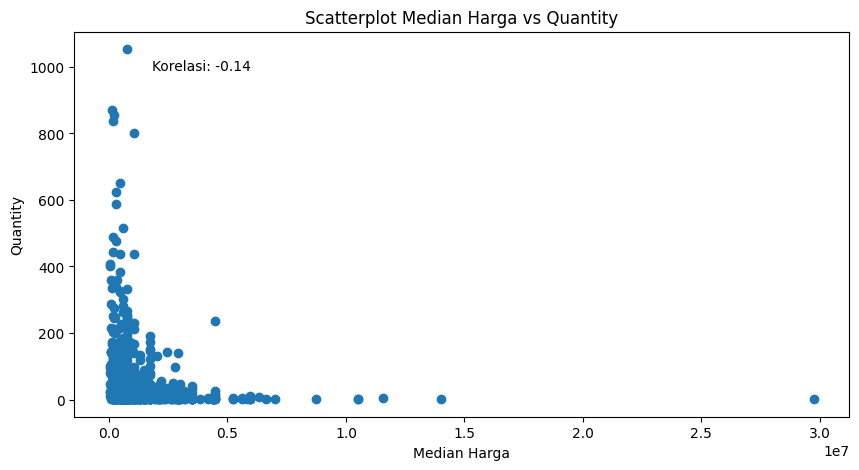

In [9]:
df['GMV'] = df['quantity'] * df['item_price']
data_product = df.groupby('product_id').agg({
    'quantity': 'sum',
    'GMV': 'sum',
    'item_price': 'median'
}).reset_index()

plt.figure(figsize=(10, 5))
plt.scatter(data_product['item_price'], data_product['quantity'])
plt.xlabel('Median Harga')
plt.ylabel('Quantity')
plt.title('Scatterplot Median Harga vs Quantity')
correlation_price = data_product['item_price'].corr(data_product['quantity'])
plt.text(0.1, 0.9, f'Korelasi: {correlation_price:.2f}', transform=plt.gca().transAxes)
plt.show()